In [1]:
import os
import numpy as np
#from utils import get_models_for_testing, test_image
#from utils import *

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [60]:
#folder = "3k-epoch/"
#folder = "50k-epoch/"
folder = "200-epoch-rl-1/"

#embs = np.load(folder+"embs_ct.npy")
#embs = np.load(folder+"embs_ct2adc.npy")
#embs = np.load(folder+"embs_ct2dwi.npy")
#masks = np.load(folder+"fs_res_ct.npy")

#embs = np.load(folder+"embs_dwi.npy")
#embs = np.load(folder+"embs_dwi2adc.npy")
embs = np.load(folder+"embs_dwi2ct.npy")
masks = np.load(folder+"fs_res_dwi.npy")

#embs = np.load(folder+"embs_adc.npy")
#embs = np.load(folder+"embs_adc2dwi.npy")
#embs = np.load(folder+"embs_adc2ct.npy")
#masks = np.load(folder+"fs_res_adc.npy")

In [61]:
print(len(embs))
print(len(masks))
print(embs)
print(masks)

708
708
[[ 2.4677013e-01  2.5654130e-02  1.3653593e+00 ...  1.6863737e+00
  -6.5288222e-01 -4.9790537e-01]
 [ 6.7255363e-02  1.1253476e-02  1.3614974e+00 ...  1.7046473e+00
  -6.1189723e-01 -4.8312882e-01]
 [-3.2979056e-02  5.4644793e-02  1.3058885e+00 ...  1.6451414e+00
  -5.3688467e-01 -3.9703605e-01]
 ...
 [ 2.6033387e-02  1.2787290e-01  1.2238801e+00 ...  1.4544095e+00
  -4.9090174e-01 -5.8820307e-01]
 [ 1.1875927e-03  1.3577348e-01  1.0540053e+00 ...  1.3036295e+00
  -3.9520311e-01 -7.2292709e-01]
 [ 1.4965311e-01  6.2988319e-02  1.3641143e+00 ...  1.6613258e+00
  -6.2652993e-01 -4.5712751e-01]]
[['ACV-002_DWI_11.png' '1']
 ['ACV-002_DWI_12.png' '1']
 ['ACV-002_DWI_13.png' '0']
 ...
 ['ACV-168_DWI_21.png' '']
 ['ACV-168_DWI_22.png' '']
 ['ACV-168_DWI_9.png' '']]


In [62]:
pca = PCA(n_components=2)
comp = pca.fit_transform(embs)

In [63]:
print(comp.shape)
print(comp[0])

(708, 2)
[ 1.0433284 -0.5250461]


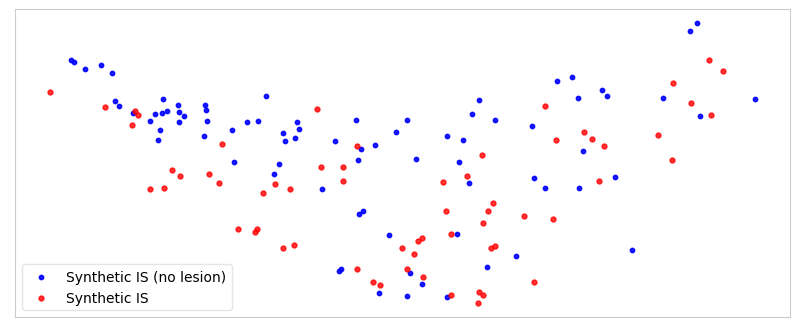

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import os

mb_list = []

mb_synth_ns = []
mb_synth_stroke = []
mb_synth_unk = []

for i in range(len(masks)):
    #print(masks[i], comp[i])
    if masks[i][1]=="":
        mb_synth_unk.append(comp[i])
    elif masks[i][1]=="0":
        mb_synth_ns.append(comp[i])
    else:
        mb_synth_stroke.append(comp[i])
    #break
    #fname, comp[i,0], comp[i,1], maskbin
    #mb_list.append(list(d.loc[d["CT"] == opt['trainA_image_names'][i]]["maskbin"])[0])
    #if (list(d.loc[d["CT"] == opt['trainA_image_names'][i]]["maskbin"])[0]==0):
    #    mb_synth_ns.append([comp[i,0], comp[i,1]])
    #else:
    #    mb_synth_stroke.append([comp[i,0], comp[i,1]])

mb_synth_ns = np.array(mb_synth_ns)
mb_synth_stroke = np.array(mb_synth_stroke)
mb_synth_unk = np.array(mb_synth_unk)

#print("hola",mb_synth_ns.shape)

#d = {'files': opt["trainA_image_names"], 'maskbin': mb_list, 'x_pca': comp[:,0], 'y_pca': comp[:,1]}
#d = pd.DataFrame(data=d)
#sns.set(rc={'figure.figsize':(10,4)})
#sns.set_style("dark")
#sns.scatterplot(data=d, x="x_umap", y="y_umap", hue="maskbin", alpha=0.6)
#sns.reset_defaults()
plt.figure(figsize=(10,4))
plt.rcParams['axes.edgecolor'] = '#CCCCCC'

#plt.scatter(mb_synth_unk[:,0], mb_synth_unk[:,1], label="unknown", alpha=0.3, s=20, marker="x")
plt.scatter(mb_synth_ns[:,0], mb_synth_ns[:,1], label="Synthetic IS (no lesion)", alpha=0.9, s=40, marker=".", color="#0000ff")
plt.scatter(mb_synth_stroke[:,0], mb_synth_stroke[:,1], label="Synthetic IS", alpha=0.8, s=50, marker=".", color="#ff0000")

plt.legend(framealpha=0.5)
plt.xticks([], [])
plt.yticks([], [])

#plt.savefig("plot01-emb-ct2ct-200ep-rl1.pdf", bbox_inches="tight")
#plt.savefig("plot01-emb-ct2adc-200ep-rl1.pdf", bbox_inches="tight")
#plt.savefig("plot01-emb-ct2dwi-200ep-rl1.pdf", bbox_inches="tight")

#plt.savefig("plot01-emb-dwi2dwi-200ep-rl1.pdf", bbox_inches="tight")
#plt.savefig("plot01-emb-dwi2adc-200ep-rl1.pdf", bbox_inches="tight")
plt.savefig("plot01-emb-dwi2ct-200ep-rl1.pdf", bbox_inches="tight")

#plt.savefig("plot01-emb-adc2adc-200ep-rl1.pdf", bbox_inches="tight")
#plt.savefig("plot01-emb-adc2dwi-200ep-rl1.pdf", bbox_inches="tight")
#plt.savefig("plot01-emb-adc2ct-200ep-rl1.pdf", bbox_inches="tight")
plt.show()

In [66]:
len(mb_synth_ns), len(masks)

(81, 708)

In [76]:
y = []
x = []
for i in range(len(masks)):
    if masks[i][1]=="1":
        x.append([comp[i][0], comp[i][1]])
        y.append("1")
    elif masks[i][1]=="0":
        x.append([comp[i][0], comp[i][1]])
        y.append("0")
    else:
        True

In [78]:
x,y

([[1.0433284, -0.5250461],
  [0.42445245, -0.10613518],
  [-0.33413294, 0.16860095],
  [-0.35066804, -0.4741688],
  [0.10499321, -1.1751454],
  [0.019465184, -1.0642717],
  [-0.91846126, 0.019699391],
  [-1.149153, 0.43554002],
  [-0.6199765, -0.012155105],
  [-0.22882955, 0.19881383],
  [0.5159894, 0.6495174],
  [0.43993923, -0.17086415],
  [0.5726647, -1.0067928],
  [-0.4602152, -0.0157763],
  [0.3105046, -1.2764885],
  [-0.0060794144, -1.0185429],
  [-1.0158799, 0.68528146],
  [-0.64737004, 0.5622977],
  [0.27467632, -0.45409596],
  [0.53152496, 0.10644532],
  [1.267459, 0.33466473],
  [1.9077863, 0.8180265],
  [2.4899466, 0.6627137],
  [1.2559923, 0.144215],
  [0.5428218, -0.56872827],
  [0.075815916, -0.7428934],
  [0.045919634, -0.87269306],
  [-0.04092333, -0.8170165],
  [0.10123263, -0.7198694],
  [0.3125129, -0.6727931],
  [0.5756144, -0.4538142],
  [0.46625748, 0.50655574],
  [1.1798701, 0.8743565],
  [2.0293882, 1.3265623],
  [2.176813, 0.5037194],
  [1.7948472, 0.30399284],